<a href="https://colab.research.google.com/github/gurman3911/past-projects/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fashion MNIST data set is remade by the CNNs

In [ ]:
#importing the tensoflow dataset
import tensorflow_datasets as tfds

In [ ]:
#importing the helper libs
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## importing the fashion mnist dataset


In [ ]:
#function to call the data 
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling fashion_mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling fashion_mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to C:\Users\91623\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## data preprosessing (images)

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

AttributeError: ignored

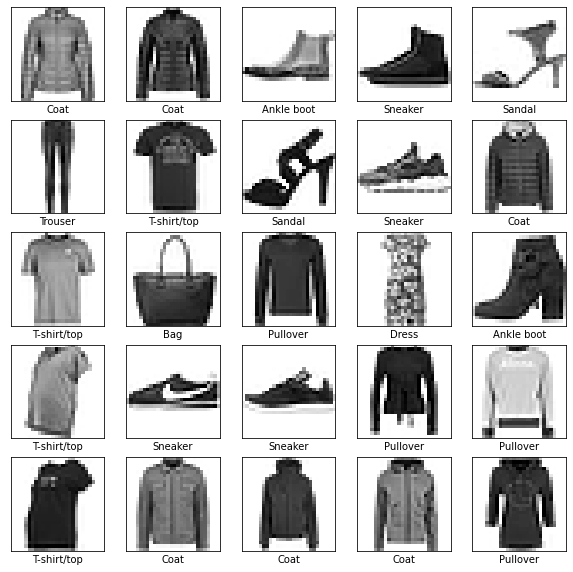

In [ ]:
#this is just to show the data in a plot format 
plt.figure(figsize=(10,10))
i=0
for image,label in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image , cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
  
plt.show()

In [ ]:
#creating the model of the cnn architecture with the input as a 28 , 28,1` 1d array of the numpy
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
#1st layer  = convolution layer of 32 and karnal of 3x3-------> input layer 
#2nd layer  = convolution layer with maxpooling of 2x2 ------->reduction of the image size
#3rd layer  = convolution layer of 64 and karnel of 3x3------->hidden layer of the convolution
#4th layer  = convolution layer with maxpooling of 2x2
#5th layer  = Dense layer with neurons equal to 128 and relu activation-------->hidden layer  
#6th layer  = Dense layer with nerurons equal to 10 ------>output layer 

## compilation of the method 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#creating batches of data for faster learning of the model 
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
#fitting the model onto the train dataset
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 48s 6ms/step - loss: 0.3910 - accuracy: 0.8595
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2572 - accuracy: 0.9057
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2153 - accuracy: 0.9218
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1807 - accuracy: 0.9334
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1564 - accuracy: 0.9413
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1331 - accuracy: 0.9512
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1106 - accuracy: 0.9585
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0966 - accuracy: 0.9643
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0794 - accuracy: 0.9707
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

### Evaluating the model

In [ ]:
test_loss , test_accuracy = model.evaluate(test_dataset , steps = math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 3s 8ms/step - loss: 0.3177 - accuracy: 0.9166


In [ ]:
print('{} is the test accuaracy of the model '.format(test_accuracy))

0.9165999889373779 is the test accuaracy of the model 


In [ ]:
print('{} is the test_loss of the model'.format(test_loss))

0.317708283662796 is the test_loss of the model


In [ ]:
#making predictions 
for test_image , test_label in test_dataset.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  predictions = model.predict(test_image)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([7.8533660e-08, 1.2342577e-10, 4.9413042e-04, 2.6697066e-08,
       4.6245325e-01, 4.2645353e-12, 5.3705251e-01, 1.0410669e-11,
       5.2005239e-10, 1.8431141e-08], dtype=float32)

In [ ]:
np.argmax(predictions[1])

6

In [ ]:
test_label[1]

4

In [ ]:
#copy pasted code for ploting image 
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

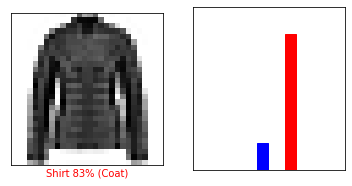

In [ ]:

i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_label)

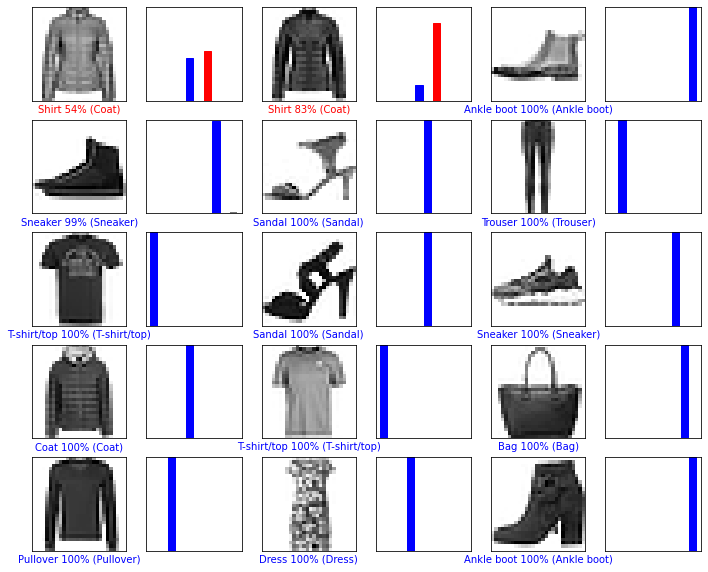

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_label)